# ROC, AUC, 혼동행렬

# 2진 카테고리 분류

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.metrics import *

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

2진 분류를 위해 레이블 0과 1의 데이터만 추린다.


In [ ]:
train_filter = np.where((train_y == 0 ) | (train_y == 1))
test_filter = np.where((test_y == 0) | (test_y == 1))

train_x, train_y = train_x[train_filter], train_y[train_filter]
test_x, test_y = test_x[test_filter], test_y[test_filter]

성능 저하를 위해 일부로 소수의 데이터만 학습에 사용

In [ ]:
train_x = train_x[:100]
train_y = train_y[:100]

In [ ]:
model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()


hist = model.fit(train_x, train_y, epochs=5, verbose=1, validation_split=0.1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = (y_>0.5).astype(np.int).squeeze()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 7,971
Trainable params: 7,971
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 0s 482ms/step - loss: 0.7413 - accuracy: 0.1889 - val_loss: 0.6999 - val_accuracy: 0.2000
Epoch 2/5
1/1 [==============================] - 0s 19ms/step - loss: 0.7128 - accuracy: 0.2111 - val_loss: 0.6

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


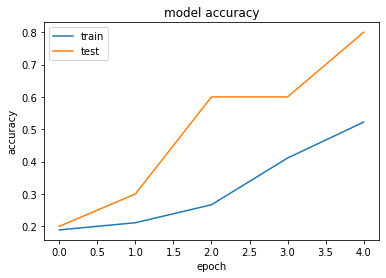

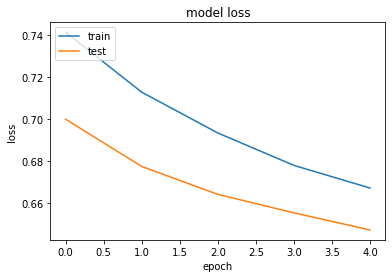

In [ ]:
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## ROC/AUC

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


### FPR, TPR, AUC 계산

In [ ]:
fpr, tpr, _ = roc_curve(test_y, predicted)
roc_auc = roc_auc_score(test_y, predicted)
print("auc =", roc_auc)

auc = 0.669628247774881


### ROC, AUC 그리기

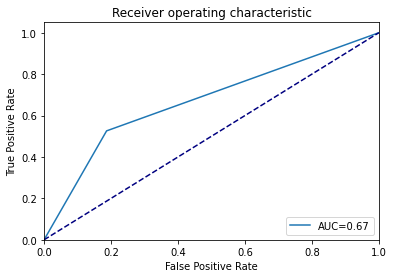

In [ ]:
plt.figure()
plt.plot(fpr, tpr, label='AUC=%0.2f' % (roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 혼동 행렬

### 행렬 계산

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)

[[797 183]
 [538 597]]


In [ ]:
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

acc: 0.6591
sensitivity: 0.8133
specificity: 0.5260


### 행렬 그리기

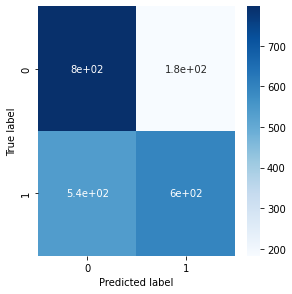

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 각 카테고리 별 지표

In [ ]:
print(classification_report(test_y, predicted, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69       980
           1       0.77      0.53      0.62      1135

    accuracy                           0.66      2115
   macro avg       0.68      0.67      0.66      2115
weighted avg       0.69      0.66      0.65      2115



# 다수 카테고리 분류

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.metrics import *

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

In [ ]:

model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


hist = model.fit(train_x, train_y, epochs=5, verbose=1, validation_split=0.1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
422/422 [==============================] - 1s 3ms/step - loss: 0.9743 - accuracy: 0.6857 - val_loss: 0.4248 - val_accuracy: 0.8725
Epoch 2/5
422/422 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.8777 - val_loss

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


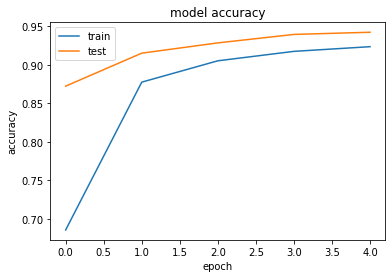

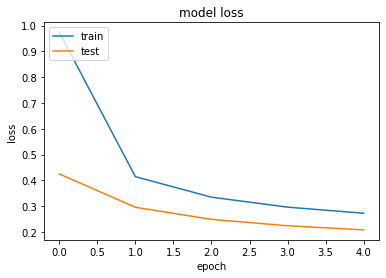

In [ ]:
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


## ROC/AUC

### FPR, TPR, AUC 계산

In [ ]:
N_CLASSES = 10

fpr = dict()   # False Positive Ratio
tpr = dict()   # True Posivive Ratio

roc_auc = dict()

# 정답에 대한 one-hot encoding된 값이 담긴다.
test_y_encoded = np.eye(N_CLASSES)[test_y]
# 예측된 값에 대한 one-hot encoding된 값이 담긴다. 
predicted_encoded = np.eye(N_CLASSES)[predicted]

# fpr[5], tpr[5]에는 카테고리 5에 대한 fpr 값들, tpr 값들이 담긴다.
for i in range(N_CLASSES):
  fpr[i], tpr[i], _ = roc_curve(test_y_encoded[:, i], predicted_encoded[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])


### ROC, AUC 그리기

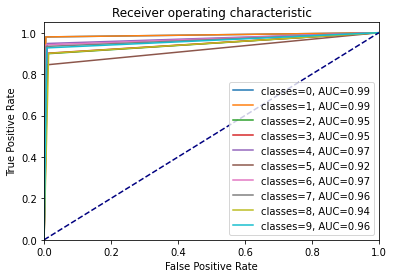

In [ ]:
plt.figure()
for i in range(N_CLASSES):
  plt.plot(fpr[i], tpr[i], label='classes=%i, AUC=%0.2f' % (i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 혼동 행렬

### 행렬 계산

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_y, predicted)
print(cm)


[[ 960    0    1    0    1    9    4    2    1    2]
 [   0 1112    3    3    0    0    2    2   13    0]
 [  12   12  927   16   11    4   11   13   22    4]
 [   0    1   20  910    1   34    1   10   26    7]
 [   0    2    3    0  931    0   13    2    7   24]
 [   9    2    4   50    8  754   14    8   37    6]
 [  10    3    4    0   18   15  902    0    6    0]
 [   2   12   21    4    8    0    0  960    2   19]
 [   4   12    7   12    9   24    8   10  877   11]
 [   7    3    0    4   32    8    0   11    9  935]]


### 행렬 그리기

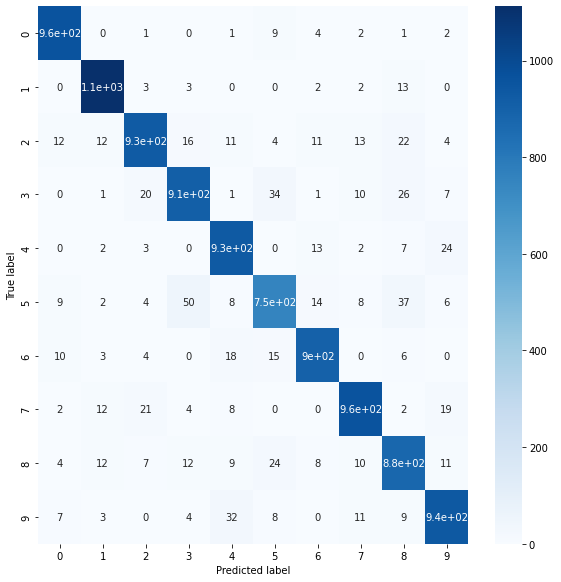

In [ ]:
import seaborn as sns

figure = plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## 각 카테고리 별 지표

In [ ]:
print(classification_report(test_y, predicted, target_names=['0','1','2','3','4','5','6','7','8','9']))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.90      0.92      1032
           3       0.91      0.90      0.91      1010
           4       0.91      0.95      0.93       982
           5       0.89      0.85      0.87       892
           6       0.94      0.94      0.94       958
           7       0.94      0.93      0.94      1028
           8       0.88      0.90      0.89       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

